<h1> Digits Detection with Artificial Neural Network</h1>

<h1> Import the Libraries</h1>

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from numpy import std
from sklearn.metrics import confusion_matrix
import seaborn as sns

#np.set_printoptions(threshold=sys.maxsize)
import tensorflow as tf
from tensorflow import keras
import datetime
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

<h1> Load and extract data for training,testing and validating</h1>

In [ ]:
digits = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = digits
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

<h1> Visualize digits</h1>

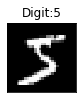

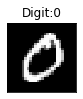

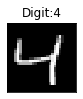

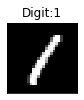

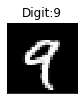

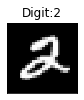

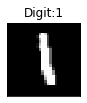

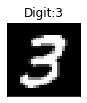

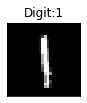

In [ ]:
plt.figure()
for digit in range(9):
    plt.subplot(3, 3, digit + 1)
    plt.tight_layout()

    plt.imshow(X_train[digit], cmap="gray", interpolation="none")
    plt.title("Digit:{}".format(y_train[digit]))
    plt.xticks([])
    plt.yticks([])
    plt.show()


<h1> Histogram analysis of the image</h1>

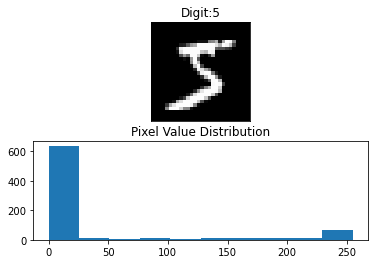

In [ ]:
plt.figure()

plt.subplot(2, 1, 1)

plt.imshow(X_train[0], cmap="gray", interpolation="none")

plt.title("Digit:{}".format(y_train[0]))

plt.xticks([])

plt.yticks([])

plt.subplot(2, 1, 2)

plt.hist(X_train[0].reshape(784))

plt.title("Pixel Value Distribution")

plt.show()


<h1> View shape of the dataset</h1>

In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
print("X_valid shape", X_valid.shape)
print("y_valid shape", y_valid.shape)


X_train shape (55000, 28, 28)
y_train shape (55000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
X_valid shape (5000, 28, 28)
y_valid shape (5000,)


<h1> Reshape input into One dimension vectors of 784 values(as image have size 28X28)</h1>

In [ ]:
X_train = X_train.reshape(55000, 784)
X_test = X_test.reshape(10000, 784)
X_valid = X_valid.reshape(5000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_valid = X_valid.astype("float32")

<h1> Normalize input data into the range 0 and 1 to enable faster convergence of the network</h1>

In [ ]:
X_train, X_test,X_valid = X_train / 255.0, X_test / 255.0, X_valid / 255.0

<h1> Final input shape ready for training</h1>

In [ ]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
print("Validating matrix shape", X_valid.shape)

Training matrix shape (55000, 784)
Testing matrix shape (10000, 784)
Validating matrix shape (5000, 784)


<h1> Create Output variable of 10 dimension </h1>

In [ ]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
Y_valid = np_utils.to_categorical(y_valid,n_classes)
print("After one hot encoder", y_train.shape,n_classes)

Shape before one-hot encoding:  (55000,)
After one hot encoder (55000,) 10


<h1> View encoded classes</h1>

In [ ]:
print('X_train',Y_train)
print('Y_test',Y_test)
print('Y_valid',Y_valid)

X_train [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Y_test [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y_valid [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


<h1> Define network parameter and architecture</h1>

<h3> Three Layers ANN </h3>

In [ ]:
# Create a linear stack of layers with sequential model
#tf.random.set_seed(42)
model = tf.keras.Sequential()

# Input layer with 512 weight
model.add(tf.keras.layers.Dense(512,input_shape =(784,),activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# Add hidden layer with 512 neurons with relu activation

model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation("relu"))  # Add relu activation function
model.add(tf.keras.layers.Dropout(0.2)) # put drop out of 20% to prevent over-fitting
model.add(tf.keras.layers.BatchNormalization()) # Normalise the data


model.add(tf.keras.layers.Dense(10 ,activation='softmax'))  # add output layer with 10 neurons


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                        

<h1> Model Weights</h1>

In [ ]:
model.get_weights()

[array([[ 0.01578381, -0.03252546,  0.01084344, ...,  0.04859315,
         -0.02411193, -0.04759657],
        [-0.05275346,  0.06796165, -0.02171296, ..., -0.0614687 ,
          0.06446686,  0.03404088],
        [-0.03845682, -0.03040228, -0.02707346, ...,  0.02655159,
         -0.05800933, -0.0182505 ],
        ...,
        [-0.05559428, -0.02174076,  0.00733254, ..., -0.03861795,
          0.0647904 ,  0.05520903],
        [ 0.05943775, -0.06474949, -0.00336304, ..., -0.0088827 ,
          0.04325459,  0.06153263],
        [ 0.00326116,  0.04848738,  0.0614713 , ...,  0.02290279,
          0.02359764,  0.02189279]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

<h1> Model Layers</h1>

In [ ]:
model.layers

<h1> Training the network</h1>

In [ ]:
# start by compiling the sequential model

model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

# Start training the model and saving metrics in history

history = model.fit(X_train,Y_train , batch_size=128, epochs=20, verbose=2,validation_data=(X_valid,Y_valid))

Epoch 1/20
430/430 - 27s - loss: 0.2506 - accuracy: 0.9235 - val_loss: 0.1070 - val_accuracy: 0.9704 - 27s/epoch - 63ms/step
Epoch 2/20
430/430 - 6s - loss: 0.1143 - accuracy: 0.9643 - val_loss: 0.0823 - val_accuracy: 0.9730 - 6s/epoch - 13ms/step
Epoch 3/20
430/430 - 6s - loss: 0.0809 - accuracy: 0.9741 - val_loss: 0.0776 - val_accuracy: 0.9778 - 6s/epoch - 13ms/step
Epoch 4/20
430/430 - 6s - loss: 0.0645 - accuracy: 0.9793 - val_loss: 0.0766 - val_accuracy: 0.9802 - 6s/epoch - 13ms/step
Epoch 5/20
430/430 - 6s - loss: 0.0532 - accuracy: 0.9829 - val_loss: 0.0660 - val_accuracy: 0.9814 - 6s/epoch - 13ms/step
Epoch 6/20
430/430 - 6s - loss: 0.0479 - accuracy: 0.9844 - val_loss: 0.0691 - val_accuracy: 0.9812 - 6s/epoch - 13ms/step
Epoch 7/20
430/430 - 6s - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0699 - val_accuracy: 0.9818 - 6s/epoch - 14ms/step
Epoch 8/20
430/430 - 6s - loss: 0.0353 - accuracy: 0.9883 - val_loss: 0.0690 - val_accuracy: 0.9812 - 6s/epoch - 13ms/step
Epoch 9/20
430

<h1>Save the model on disk in HDF5 file format</h1>

In [ ]:
# Saving the model on disk

path2save =  r'C:\Users\User\PycharmProjects\MSC CONTECH STUDY\Msc 1006 Asiignments and Project'
model.save(path2save)

INFO:tensorflow:Assets written to: C:\Users\User\PycharmProjects\MSC CONTECH STUDY\Msc 1006 Asiignments and Project\assets


<h1> plotting the metrics </h1>

In [ ]:

fig =plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','test'],loc='lower right')


plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout()
plt.show()



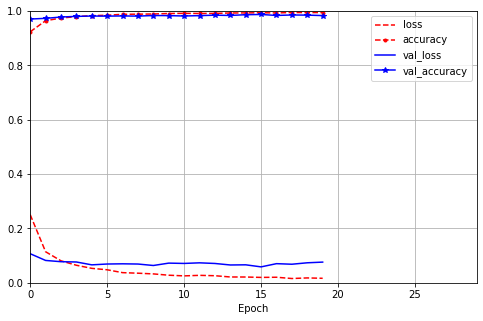

In [ ]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

<h1> Load the Model for testing</h1>

In [ ]:
path2save = r'C:\Users\User\PycharmProjects\MSC CONTECH STUDY\Msc 1006 Asiignments and Project' 
mnist_model = load_model(path2save)

<h1> Testing the model</h1>

In [ ]:
# We will use evaluation function
#loss_metrics = mnist_model.evaluate(X_test,Y_test,verbose=2)
loss_metrics = model.evaluate(X_test,Y_test,verbose=2)
print("Test Loss", loss_metrics[0])

print("Test Accuracy",loss_metrics[1])

# Load the model and create prediction on the test set

#mnist_model = load_model(path2save)

313/313 - 1s - loss: 0.0752 - accuracy: 0.9828 - 984ms/epoch - 3ms/step
Test Loss 0.07516572624444962
Test Accuracy 0.9828000068664551


# Predicting the labels

In [ ]:
class_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
X_new_digit = X_test_digit
y_proba = model.predict(X_new_digit[:20])
y_proba.round(2)

1/1 [==============================] - 0s 32ms/step


array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1

In [ ]:
y_pred_labels = y_proba.argmax(axis=-1)
y_pred_labels

array([9, 9, 9, 4, 9, 4, 4, 4, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 9, 4],
      dtype=int64)

In [ ]:
np.array(class_names)[y_pred_labels]

array(['Nine', 'Nine', 'Nine', 'Four', 'Nine', 'Four', 'Four', 'Four',
       'Nine', 'Four', 'Nine', 'Four', 'Four', 'Nine', 'Four', 'Four',
       'Four', 'Nine', 'Nine', 'Four'], dtype='<U5')

<h1> Aritificial Neural Netwok 2</h1>

<h2> Improved  Model</h2>

In [ ]:
digits_ = tf.keras.datasets.mnist.load_data()
digits_ = (X_train_full, y_train_full), (X_test, y_test)
X_train2, y_train2 = X_train_full[:-5000], y_train_full[:-5000]


# Normalize data

In [ ]:
X_train2, X_test2 = X_train2 / 255., X_test / 255

In [ ]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test.shape)
print(y_test.shape)

(55000, 28, 28)
(55000,)
(10000, 784)
(10000,)


## Label the digit and Visualize digit

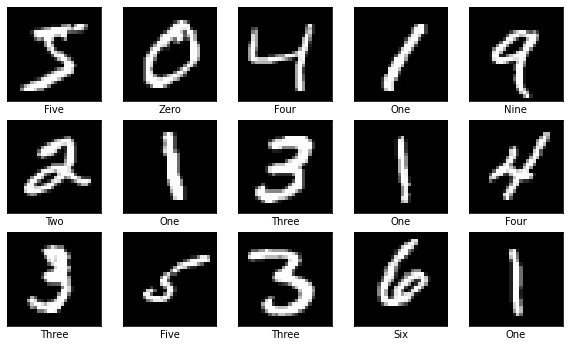

In [ ]:
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train2[i], cmap='gray')
    plt.xlabel(col_names[y_train[i]])
plt.show()

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

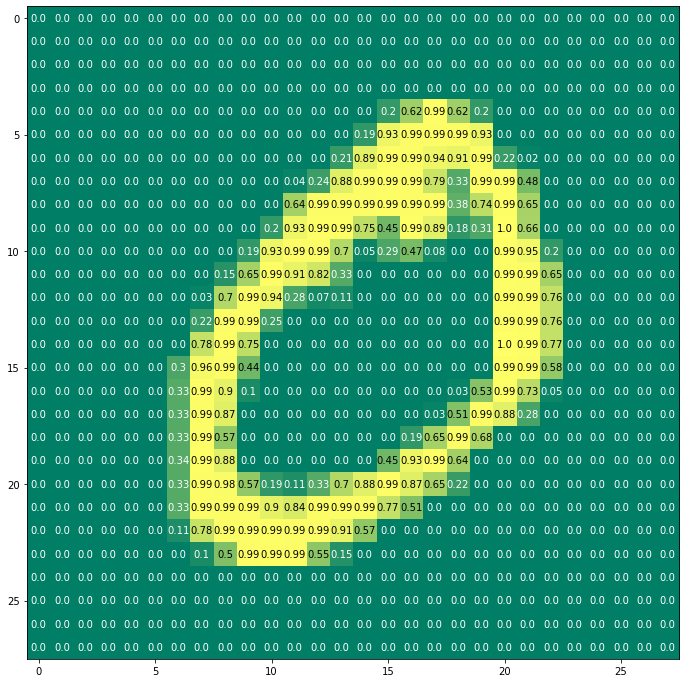

In [ ]:
#Visualizing for digit MNIST
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train2[1], ax)
plt.show()

In [ ]:
X_train_digit = X_train2
X_test_digit = X_test2
y_train_digit = y_train
y_test_digit = y_test

In [ ]:
y_train_digit[0]

5

## Define the network architechure with Three layers ANN

In [ ]:
#Creating base neural network
# 3 layer ANN: input, hidde, and output

model2 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)


# Compile the model

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"])

# Fit and train the model

In [ ]:
history2 = model2.fit(X_train_digit, y_train_digit, batch_size=100, epochs=30,validation_split=(0.2))
history2

Epoch 1/30
440/440 [==============================] - 7s 5ms/step - loss: 1.0832 - accuracy: 0.7328 - val_loss: 0.5579 - val_accuracy: 0.8651
Epoch 2/30
440/440 [==============================] - 2s 5ms/step - loss: 0.4493 - accuracy: 0.8881 - val_loss: 0.3970 - val_accuracy: 0.8935
Epoch 3/30
440/440 [==============================] - 2s 5ms/step - loss: 0.3474 - accuracy: 0.9087 - val_loss: 0.3375 - val_accuracy: 0.9078
Epoch 4/30
440/440 [==============================] - 2s 4ms/step - loss: 0.3004 - accuracy: 0.9187 - val_loss: 0.3047 - val_accuracy: 0.9160
Epoch 5/30
440/440 [==============================] - 2s 4ms/step - loss: 0.2698 - accuracy: 0.9259 - val_loss: 0.2813 - val_accuracy: 0.9209
Epoch 6/30
440/440 [==============================] - 2s 4ms/step - loss: 0.2472 - accuracy: 0.9320 - val_loss: 0.2639 - val_accuracy: 0.9261
Epoch 7/30
440/440 [==============================] - 2s 4ms/step - loss: 0.2289 - accuracy: 0.9367 - val_loss: 0.2466 - val_accuracy: 0.9306
Epoch 

In [ ]:
 model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.get_weights()

[array([[-0.05438995,  0.03021391, -0.01163516, ...,  0.00464771,
          0.0048135 , -0.05813517],
        [-0.02979431, -0.01627181, -0.07336126, ..., -0.03786708,
          0.05420742,  0.01486574],
        [-0.02995632, -0.03970021, -0.00450165, ..., -0.02040759,
         -0.04526114,  0.05282361],
        ...,
        [-0.00528847,  0.06811065, -0.05118763, ..., -0.0615738 ,
          0.0166676 , -0.02955113],
        [-0.00953726, -0.04608874,  0.01022066, ...,  0.02005776,
          0.07506239,  0.05788522],
        [-0.05206497, -0.08033665,  0.02889521, ...,  0.04502548,
         -0.03407028, -0.06103595]], dtype=float32),
 array([ 0.05021653, -0.01571755,  0.009582  , -0.05557196,  0.01362807,
        -0.05291669, -0.01510843, -0.06415851,  0.01168298, -0.06067526,
         0.01282958, -0.08200169, -0.08601467, -0.03409177,  0.06749188,
        -0.03951704,  0.08450366, -0.02028938, -0.04518062, -0.06530446,
        -0.03298904, -0.01996276,  0.02930869, -0.06014714, -0.051

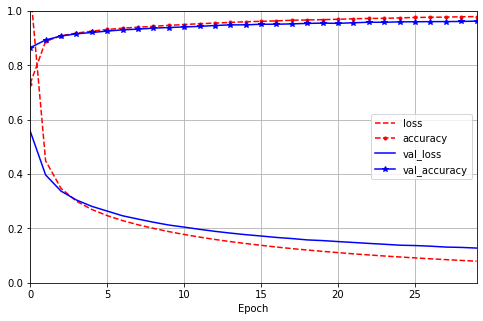

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history2.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [ ]:
history2.history['accuracy']

[0.7327954769134521,
 0.8880681991577148,
 0.9087045192718506,
 0.9187272787094116,
 0.9258636236190796,
 0.9319772720336914,
 0.9367499947547913,
 0.940500020980835,
 0.9436363577842712,
 0.9471136331558228,
 0.9502727389335632,
 0.9532727003097534,
 0.9554545283317566,
 0.9579545259475708,
 0.9604772925376892,
 0.9620227217674255,
 0.963772714138031,
 0.9660454392433167,
 0.967022716999054,
 0.9682499766349792,
 0.9695000052452087,
 0.9714772701263428,
 0.9725454449653625,
 0.9731818437576294,
 0.974613606929779,
 0.9762045741081238,
 0.9769318103790283,
 0.9775682091712952,
 0.9788408875465393,
 0.9793409109115601]

## Evaluate mode performance

In [ ]:
test_loss_digit, test_accuracy_digit = model2.evaluate(X_test_digit, y_test_digit)

313/313 [==============================] - 1s 3ms/step - loss: 2.3479 - accuracy: 0.0892


In [ ]:
print("Mnist Test Loss",round(test_loss_digit,4))
print("Mnist Test Accuracy",round(test_accuracy_digit,4))

Mnist Test Loss 2.3479
Mnist Test Accuracy 0.0892


# Predicting the labels digit

In [ ]:
X_new = X_test_digit[:9]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 32ms/step


array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32)

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 9, 9, 4, 9, 4, 4, 4, 9], dtype=int64)

In [ ]:
np.array(col_names)[y_pred]

array(['Nine', 'Nine', 'Nine', 'Four', 'Nine', 'Four', 'Four', 'Four',
       'Nine'], dtype='<U5')

# Hypertuning the ANN for better performance

In [ ]:
import keras_tuner as kt
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
    sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
        model.add(tf.keras.layers.Dense(10, activation="softmax"))
        model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
        metrics=["accuracy"])
        return model


In [ ]:
random_search_tuner = kt.RandomSearch(
build_model, objective="val_accuracy", max_trials=5, overwrite=True,
directory="mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
validation_data=(X_valid, y_valid))


Trial 5 Complete [00h 01m 03s]
val_accuracy: 0.8938000202178955

Best val_accuracy So Far: 0.968999981880188
Total elapsed time: 00h 05m 11s
INFO:tensorflow:Oracle triggered exit


In [ ]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]


In [ ]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values # best hyperparameter values


# Conclusion

For this project, two artificial neural networks were created with various structures. The first ANN has three splits of data, training, testing, and validation data. Three layers were created; an input layer of 1 diemension with a shape size of 784. The three layers comprises of input, hidden and output layer. The hidden layer has 512 neurons. The activation function used was 'relu' since it helps to substitute the hassle of linearity which lead to varnishing. Softmax activation was used for the output layer activation since we are expecting 10 outputs for each class so we set the dimension to 10. A dropout of 2% was used to reduce overfitting. Batch normalization was used to normalize data across the network. Finally, 98% accuracy was achieved with a test loss of 0.7 which is a good model.

For the Second artificial neural network. We also created 3 layers which comprises of an input layer, hidden layer and output layer.  The learning rate was set to 0.00001, and 86% test accuracy was achieved with a test loss of 2.34.
The first Ann performance seems to be better due to various techniques used.

We further hypertune the network and 96% best accuracy was achieved.